# DECOMPOSIÇÃO DE SÉRIE TEMPORAL

# 0.0 Importações

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from matplotlib.pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose

sns.set()

In [2]:
rcParams['figure.figsize'] = 18,8

# 1.0 Concentração de CO2
Concentração de CO2 na atmosfera em ppm de março de 1958 a dezembro de 2001. Observatório Mauna Loa, Havaí.

In [3]:
concentracao = sm.datasets.co2.load_pandas().data
concentracao

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3


In [4]:
concentracao.isnull().sum()

co2    59
dtype: int64

In [5]:
concentracao.dropna(inplace=True)

In [6]:
serie = pd.Series(concentracao['co2'].values, index=concentracao.index)

<AxesSubplot:>

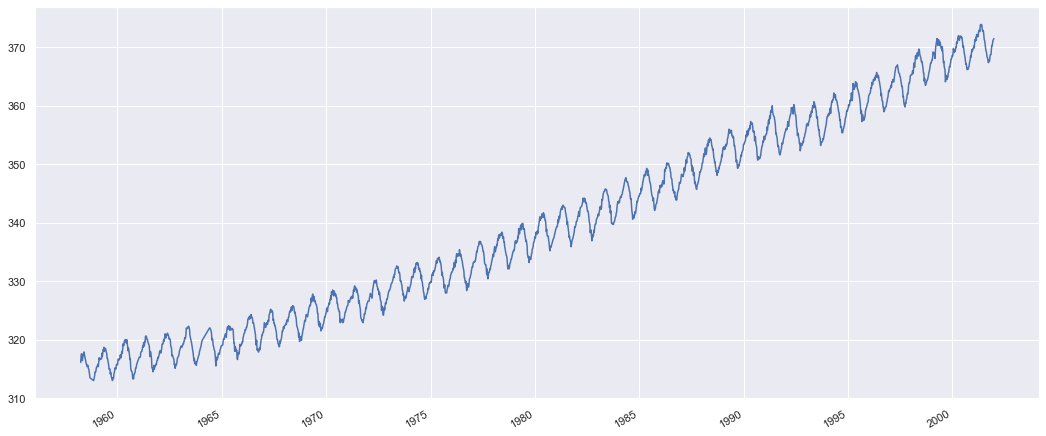

In [7]:
serie.plot()

<ipython-input-8-d23854218847>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposicao = seasonal_decompose(serie, freq=7)


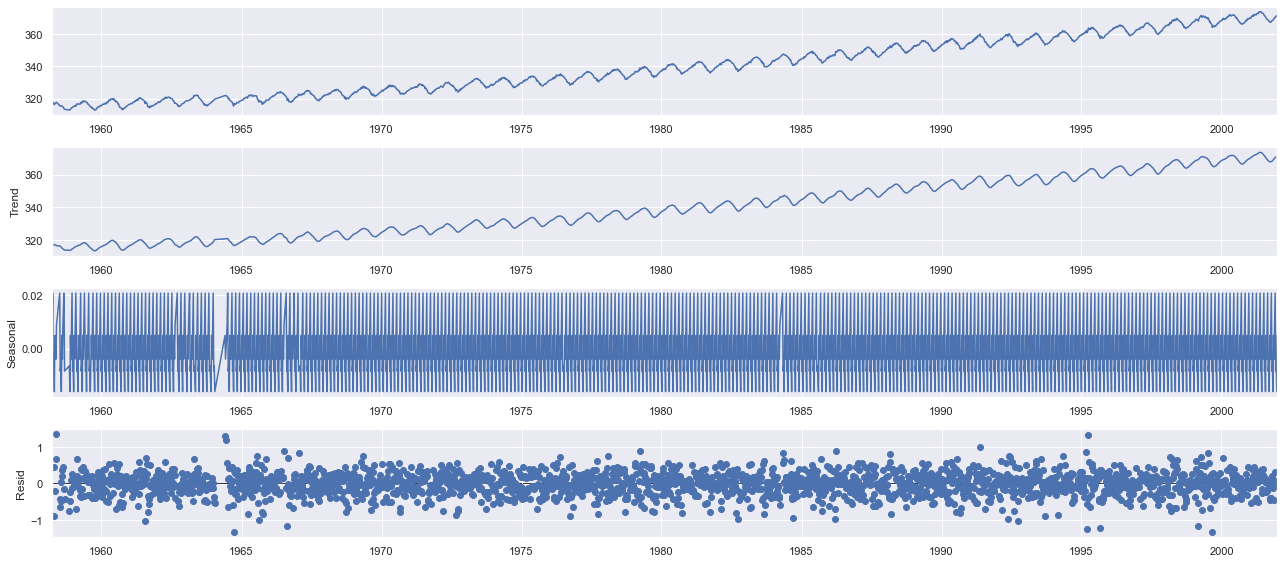

In [8]:
decomposicao = seasonal_decompose(serie, freq=7)
decomposicao.plot();

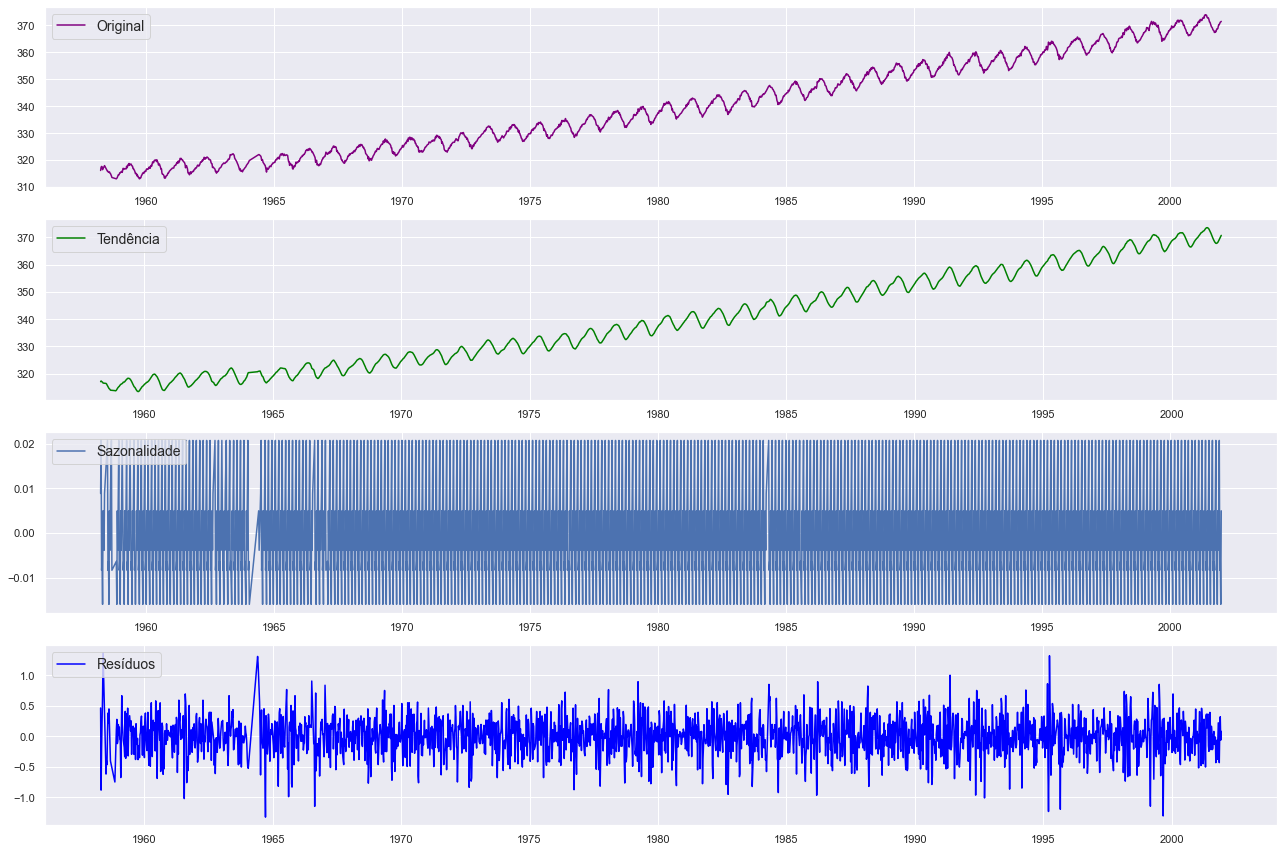

In [9]:
plt.figure(figsize=(18,12))
plt.subplot(411)
plt.plot(serie, label='Original', color='purple')
plt.legend(loc='upper left', fontsize=14)
plt.subplot(412)
plt.plot(decomposicao.trend, label='Tendência',color='green')
plt.legend(loc='upper left', fontsize=14)
plt.subplot(413)
plt.plot(decomposicao.seasonal,label='Sazonalidade')
plt.legend(loc='upper left', fontsize=14)
plt.subplot(414)
plt.plot(decomposicao.resid, label='Resíduos',color='blue')
plt.legend(loc='upper left', fontsize=14)
plt.tight_layout()
plt.show()

# 2.0 Manchas Solares 1

In [10]:
manchas_solares = pd.read_csv('Data/sunspots.csv')

In [11]:
manchas_solares

,x
1,58.0
2,62.6
3,70.0
4,55.7
5,85.0
...,...
2816,71.8
2817,50.3
2818,55.8
2819,33.3


In [12]:
manchas_solares.columns = ['valores']

In [13]:
manchas_solares = manchas_solares.reset_index(drop=True)

In [14]:
indice = pd.date_range('1749', periods=len(manchas_solares), freq='M')
indice

DatetimeIndex(['1749-01-31', '1749-02-28', '1749-03-31', '1749-04-30',
               '1749-05-31', '1749-06-30', '1749-07-31', '1749-08-31',
               '1749-09-30', '1749-10-31',
               ...
               '1983-03-31', '1983-04-30', '1983-05-31', '1983-06-30',
               '1983-07-31', '1983-08-31', '1983-09-30', '1983-10-31',
               '1983-11-30', '1983-12-31'],
              dtype='datetime64[ns]', length=2820, freq='M')

<AxesSubplot:>

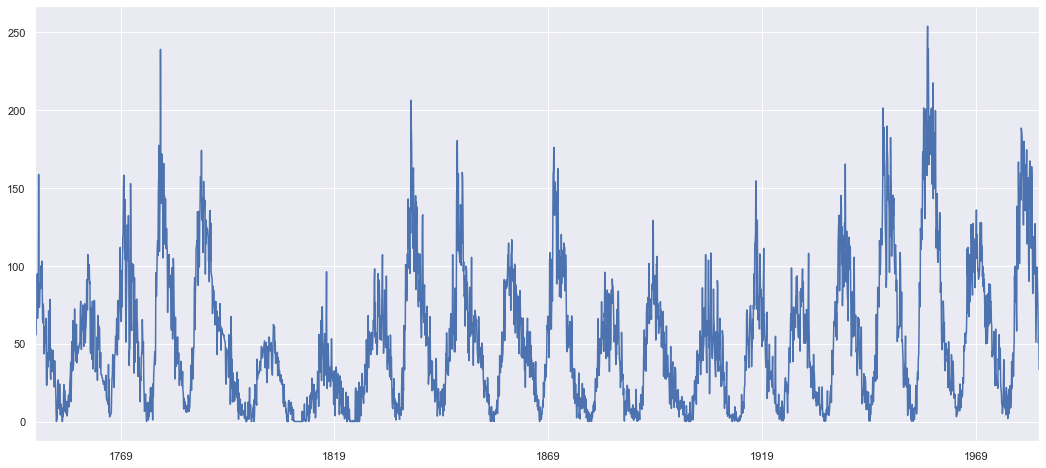

In [15]:
serie2 = pd.Series(manchas_solares['valores'].values, index=indice)
serie2.plot()

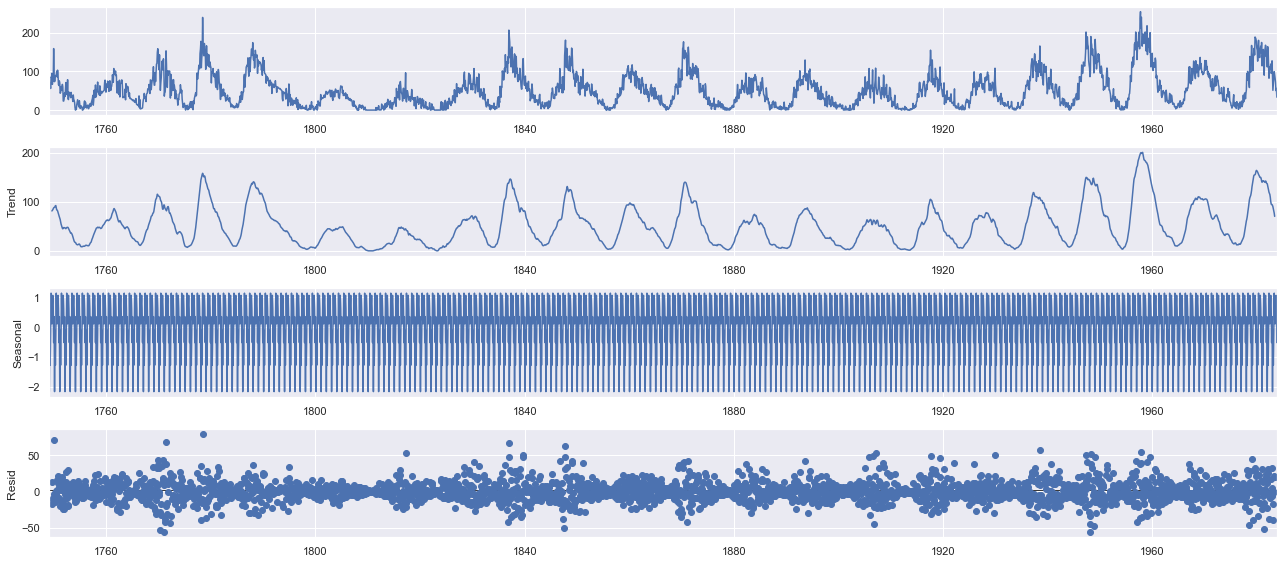

In [16]:
decomposicao2 = seasonal_decompose(serie2)
decomposicao2.plot();

# 3.0 Manchas Solares 2

In [17]:
manchas_solares = sm.datasets.sunspots.load_pandas().data
manchas_solares

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0
...,...,...
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5


In [18]:
indice = pd.date_range('1700', periods=len(manchas_solares), freq='Y')
indice

DatetimeIndex(['1700-12-31', '1701-12-31', '1702-12-31', '1703-12-31',
               '1704-12-31', '1705-12-31', '1706-12-31', '1707-12-31',
               '1708-12-31', '1709-12-31',
               ...
               '1999-12-31', '2000-12-31', '2001-12-31', '2002-12-31',
               '2003-12-31', '2004-12-31', '2005-12-31', '2006-12-31',
               '2007-12-31', '2008-12-31'],
              dtype='datetime64[ns]', length=309, freq='A-DEC')

In [19]:
serie3 = pd.Series(manchas_solares['SUNACTIVITY'].values, index=manchas_solares['YEAR'])
serie3

YEAR
1700.0     5.0
1701.0    11.0
1702.0    16.0
1703.0    23.0
1704.0    36.0
          ... 
2004.0    40.4
2005.0    29.8
2006.0    15.2
2007.0     7.5
2008.0     2.9
Length: 309, dtype: float64

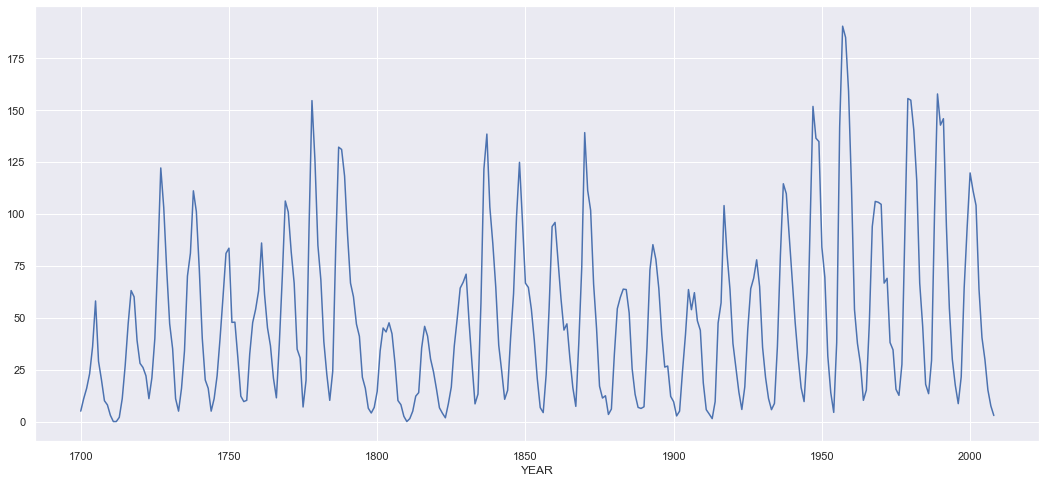

In [20]:
serie3.plot();

<ipython-input-21-2341bbdc95b4>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposicao3 = seasonal_decompose(serie3, freq=2)


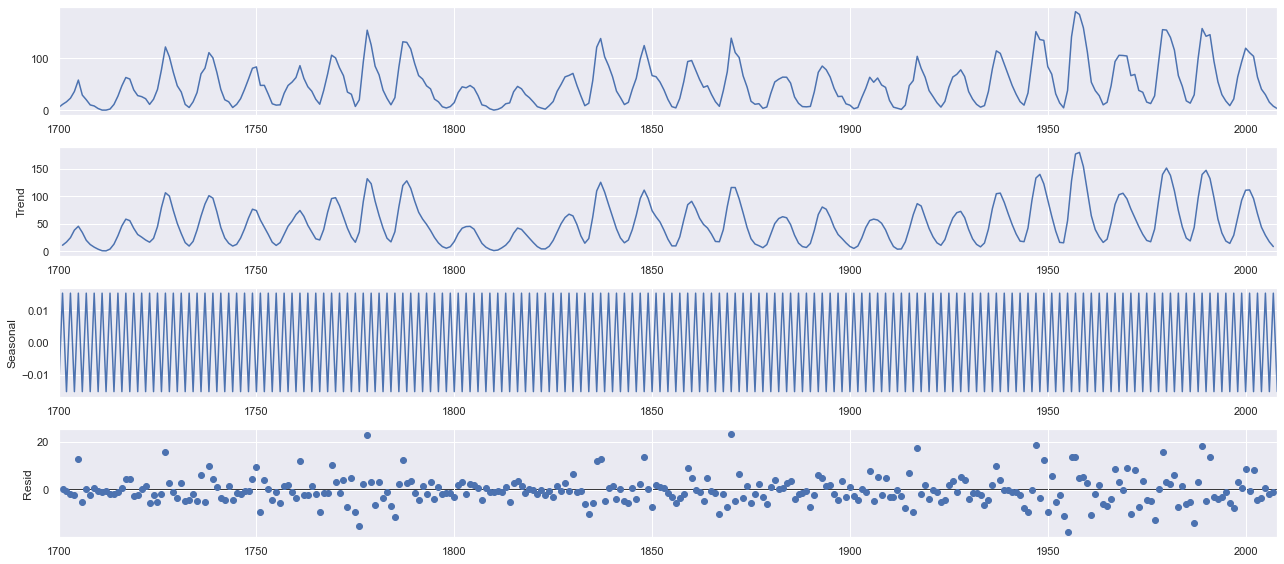

In [21]:
decomposicao3 = seasonal_decompose(serie3, freq=2)
decomposicao3.plot();

<AxesSubplot:>

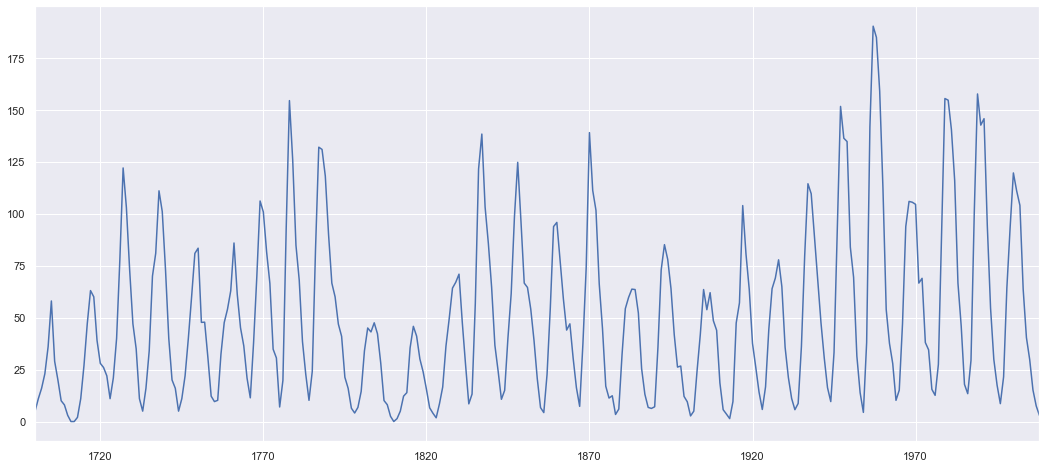

In [22]:
serie4 = pd.Series(manchas_solares['SUNACTIVITY'].values, index=indice)
serie4.plot()

<ipython-input-23-5010123ab90e>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposicao4 = seasonal_decompose(serie4, freq=3)


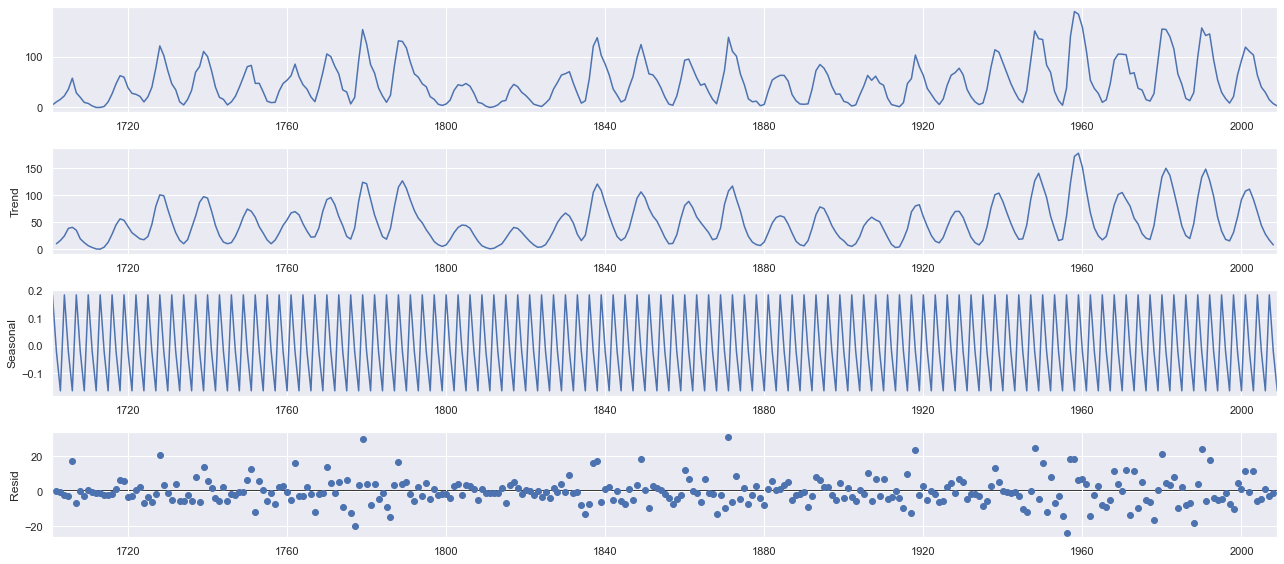

In [23]:
decomposicao4 = seasonal_decompose(serie4, freq=3)
decomposicao4.plot();